# Sentiment analysis on Trump's tweets using Python 

## What will we need?

- <strong>NumPy</strong>: This is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data.
- <strong> Pandas</strong>: This is an open source library providing high-performance, easy-to-use data structures and data analysis tools.
- <strong>Tweepy</strong>: This is an easy-to-use Python library for accessing the Twitter API.
- <strong>Matplotlib</strong>: This is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
- <strong>Seaborn</strong>: This is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- <strong>Textblob</strong>: This is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

# 1. Extracting twitter data (tweepy + pandas)

In [6]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#import our access keys:
from credentials import * # This will allow us to use the keys as variables

In [12]:
# API's setup:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

#### Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @realDonaldTrump as the user to extract data for a posterior analysis. Yeah, we wanna keep it interesting, LOL.

The way to extract Twitter's data is as follows:

In [119]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=300)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

I will always remember the time I spent today with courageous students, teachers and families. So much love in the… https://t.co/u8ZYPzhp2S

.@FLOTUS Melania and I join millions of people around the world in mourning the passing of Billy Graham. Our prayer… https://t.co/Q8BrGTiHuP

Yesterday, it was my great honor to recognize extraordinary Law Enforcement Officers and First Responders, and to a… https://t.co/PsfNaJrfEB

Question: If all of the Russian meddling took place during the Obama Administration, right up to January 20th, why… https://t.co/dquN8v8VwU

The GREAT Billy Graham is dead. There was nobody like him! He will be missed by Christians and all religions. A very special man.



#### Creating a (pandas) DataFrame

In [120]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,I will always remember the time I spent today ...
1,.@FLOTUS Melania and I join millions of people...
2,"Yesterday, it was my great honor to recognize ..."
3,Question: If all of the Russian meddling took ...
4,The GREAT Billy Graham is dead. There was nobo...
5,@CNN @MSNBC Whether we are Republican or Democ...
6,"So true, thank you! https://t.co/9TTXlfokYz"
7,Bad ratings @CNN &amp; @MSNBC got scammed when...
8,Main Street is BOOMING thanks to our incredibl...
9,....cameras running. Another False Accusation....


In [121]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [122]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

966487844662456320
2018-02-22 01:40:33
Twitter for iPhone
57578
13713
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/u8ZYPzhp2S', 'expanded_url': 'https://twitter.com/i/web/status/966487844662456320', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}


####  Adding relevant info to our dataframe

As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. For this we will use Pythons list comprehension and a new column will be added to the dataframe by just simply adding the name of the content between square brackets and assign the content. The code goes as...:



In [123]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [124]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,I will always remember the time I spent today ...,139,966487844662456320,2018-02-22 01:40:33,Twitter for iPhone,57578,13713
1,.@FLOTUS Melania and I join millions of people...,140,966420452070559749,2018-02-21 21:12:45,Twitter for iPhone,58734,13667
2,"Yesterday, it was my great honor to recognize ...",140,966377081469882368,2018-02-21 18:20:25,Media Studio,55536,11777
3,Question: If all of the Russian meddling took ...,139,966321700588711936,2018-02-21 14:40:21,Twitter for iPhone,95196,27177
4,The GREAT Billy Graham is dead. There was nobo...,129,966317112565420033,2018-02-21 14:22:07,Twitter for iPhone,127788,27023
5,@CNN @MSNBC Whether we are Republican or Democ...,104,966119932793585664,2018-02-21 01:18:36,Twitter for iPhone,74009,15119
6,"So true, thank you! https://t.co/9TTXlfokYz",43,966118856874971138,2018-02-21 01:14:19,Twitter for iPhone,91271,20729
7,Bad ratings @CNN &amp; @MSNBC got scammed when...,144,966117265426001920,2018-02-21 01:08:00,Twitter for iPhone,87731,21130
8,Main Street is BOOMING thanks to our incredibl...,139,966006815745040384,2018-02-20 17:49:07,Twitter for iPhone,69453,16769
9,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,74840,19184


# 2. Visualization and basic statistics

### 2.1. Averages and popularity

In [125]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 129.54


In [126]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of likes: 240339
139 characters.

The tweet with more retweets is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of retweets: 63896
139 characters.



### 2.2. Time series

Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

The way we do it is:

In [127]:
# We create time series for data:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

And if we want to plot the time series, pandas already has its own method in the object. We can plot a time series as follows:

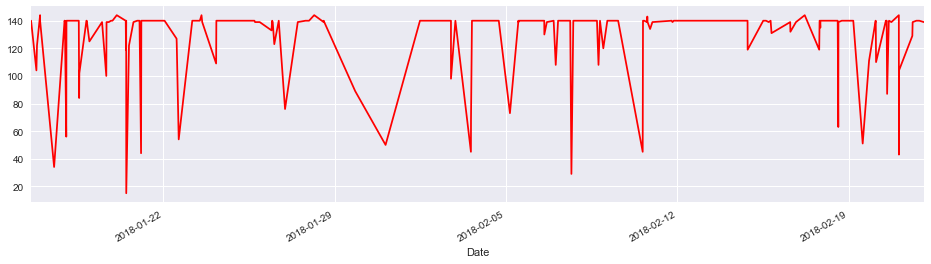

In [128]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

And to plot the likes versus the retweets in the same chart:

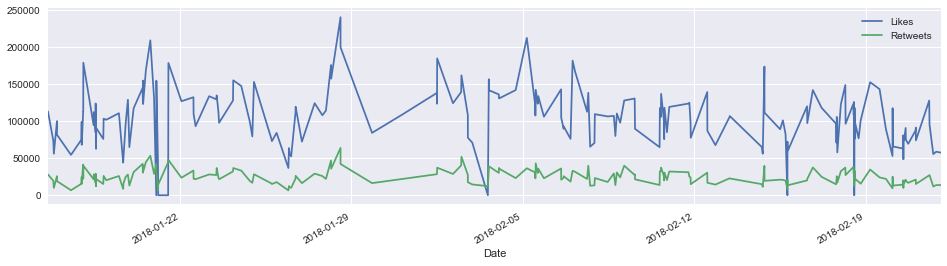

In [129]:
# Likes vs retweets visualization:

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

###  2.3. Pie charts of sources

We're almost done with this second section of the post. Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source (😱🤔). We first clean all the sources:

In [130]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio
* Twitter for iPad


We now count the number of each source and create a pie chart. You'll notice that this code cell is not the most optimized one... Please have in mind that it was 4 in the morning when I was designing this workshop. 😅



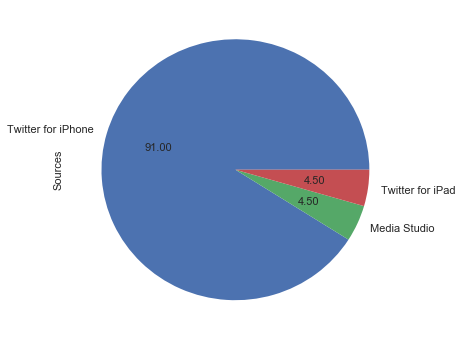

In [131]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# 3. Sentiment analysis

### 3.1. Importing textblob

As we mentioned at the beginning of this post, textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the official redocumentation.



In [132]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

The way it works is that textblob already provides a trained analyzer (cool, right?). Textblob can work with different machine learning models used in natural language processing. If you want to train your own classifier (or at least check how it works) feel free to check the following link (https://textblob.readthedocs.io/en/dev/classifiers.html). It might result relevant since we're working with a pre-trained model (for which we don't not the data that was used).

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [133]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,I will always remember the time I spent today ...,139,966487844662456320,2018-02-22 01:40:33,Twitter for iPhone,57578,13713,1
1,.@FLOTUS Melania and I join millions of people...,140,966420452070559749,2018-02-21 21:12:45,Twitter for iPhone,58734,13667,0
2,"Yesterday, it was my great honor to recognize ...",140,966377081469882368,2018-02-21 18:20:25,Media Studio,55536,11777,1
3,Question: If all of the Russian meddling took ...,139,966321700588711936,2018-02-21 14:40:21,Twitter for iPhone,95196,27177,1
4,The GREAT Billy Graham is dead. There was nobo...,129,966317112565420033,2018-02-21 14:22:07,Twitter for iPhone,127788,27023,1
5,@CNN @MSNBC Whether we are Republican or Democ...,104,966119932793585664,2018-02-21 01:18:36,Twitter for iPhone,74009,15119,0
6,"So true, thank you! https://t.co/9TTXlfokYz",43,966118856874971138,2018-02-21 01:14:19,Twitter for iPhone,91271,20729,1
7,Bad ratings @CNN &amp; @MSNBC got scammed when...,144,966117265426001920,2018-02-21 01:08:00,Twitter for iPhone,87731,21130,-1
8,Main Street is BOOMING thanks to our incredibl...,139,966006815745040384,2018-02-20 17:49:07,Twitter for iPhone,69453,16769,1
9,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,74840,19184,-1


### 3.2. Analyzing the results



To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.



In [134]:
# We construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

Now that we have the lists, we just print the percentages:



In [135]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 54.5%
Percentage of neutral tweets: 23.5%
Percentage de negative tweets: 22.0%


In [136]:
data.to_csv('TrumpsTweet.csv')


PermissionError: [Errno 13] Permission denied: 'TrumpsTweet.csv'